## Determination of the far field diffraction pattern from a rectangular aperture (Ydir)

### by Kevin Javier Zvonarek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq

### E(y,0)

Electric field amplitude captured 0 mm from the slit is approximated by an artificial box function.

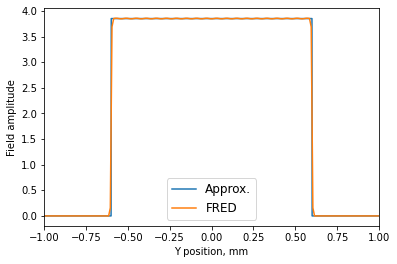

In [2]:
data = np.loadtxt('Ey0fieldamplitude.txt')
y = data[:,0]
Ey0fieldamplitude = data[:,1]
x = np.linspace(-50, 50, num = 100000)
field = np.zeros(x.size) 
field[np.logical_and(x > -0.60, x <= 0.60)] = 3.8525
plt.plot(x, field, '-',label='Approx.')
plt.plot(y,Ey0fieldamplitude,label='FRED')
plt.xlabel(r'Y position, mm')
plt.ylabel(r'Field amplitude')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='best')
plt.xlim(-1,1)
plt.show()

Enlarged view to demonstrate oscillatory behavior on the plateau feature of the box function. Where the blue and orange lines represent the aritifical box function and FRED's output, respectively.

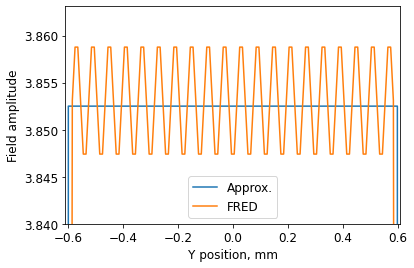

In [3]:
plt.plot(x, field, '-',label='Approx.')
plt.plot(y,Ey0fieldamplitude,label='FRED')
plt.xlabel(r'Y position, mm')
plt.ylabel(r'Field amplitude')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='best')
plt.ylim((3.84, 3.8631))
plt.xlim((-.61,.61))
plt.show()

### FT: E(y,0) -> E(ky)

Need to shift the input field so that the point corresponding to y=0 lies in the first element of the array. Also, need to multiply the fft results by the spacing, dy, to obtain the correct scaling/units.

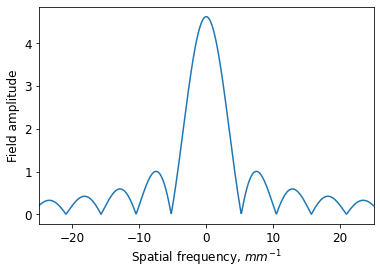

In [4]:
dy = x[1] - x[0] # Spatial sampling period, mm
fS = 1 / dy      # Spatial sampling frequency, units are inverse mm
f  = fftshift(fftfreq(field.size)*fS*2*np.pi) # inverse mm
Ek = fftshift(fft(field))*dy
plt.plot(f, abs(Ek), '-')
plt.xlim((-25, 25))
plt.xlabel(r'Spatial frequency, $mm^{-1}$')
plt.ylabel(r'Field amplitude')
plt.show()

### iFT: E(ky)exp(-ikz) -> E(y,50)

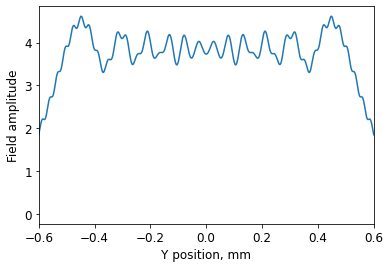

In [5]:
z = 50 #Prop. distance in z-direction (mm)
c = 3e11 #c in mm/s; cancels out regardless
wavelength = 6.328e-4 #638 nm to mm
WC2 = ((2*np.pi*(c/wavelength))/(c))**2
Ky2 = f**2
Kz = np.sqrt(WC2 - Ky2)
Ey50 = ifft(ifftshift(Ek*np.exp((-1j)*z*Kz)))*fS
plt.plot(x,abs(Ey50))
plt.xlim(-.6,0.6)
plt.xlabel(r'Y position, mm')
plt.ylabel(r'Field amplitude')
plt.show()

### Output from FRED: E(y,50) field amplitude

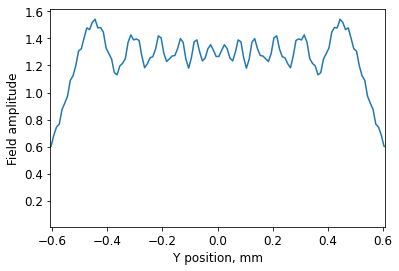

In [6]:
data1 = np.loadtxt('Ey50fieldamplitude.txt')
y = data1[:,0];
Ey50energy = data1[:,1];
plt.plot(y,Ey50energy)
plt.xlabel(r'Y position, mm')
plt.ylabel(r'Field amplitude')
plt.xlim(-.60805,0.6085)
plt.show()

### Comparison of FRED and Analytical Solution

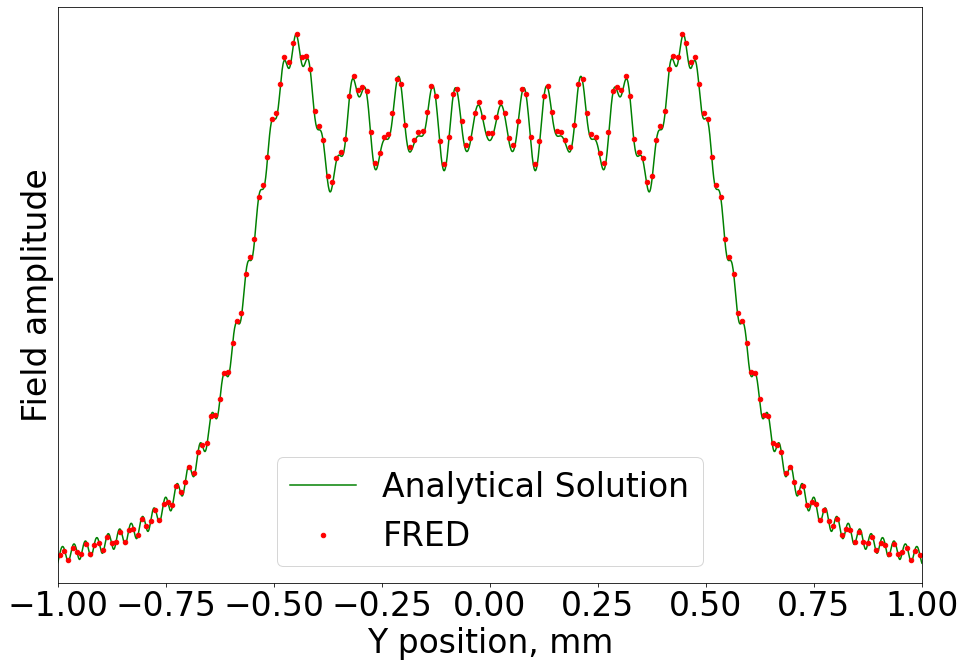

In [9]:
x1 = y
Ex50energy= Ey50energy
pad = np.zeros(999750)
rightx1 = np.hstack((x1,pad))
fullx1 = np.hstack((pad,rightx1))
rightEx50energy = np.hstack((Ex50energy,pad))
fullEx50energy = np.hstack((pad,rightEx50energy))
Ex50 = Ey50
fig1 = plt.figure(1)
ax = fig1.add_axes([0,0,2,2])
ax.plot(x,abs(Ex50- min(abs(Ex50)))/(max(abs(Ex50)) - min(abs(Ex50))),'g',label="Analytical Solution")
ax.plot(fullx1,(fullEx50energy - min(abs(fullEx50energy)))/(max(abs(fullEx50energy)) - min(abs(fullEx50energy))),"r.",markersize = 9, label="FRED")
ax.set_xlabel(r'Y position, mm')
ax.set_ylabel(r'Field amplitude')
ax.axis([-1., 1., 0.01, 1.05])
plt.rcParams.update({'font.size':33})
ax.legend(loc='best')
ax.set_yticks([])
ax.set_yticklabels([])
#fig1.savefig("Yposition50mm.pdf", bbox_inches='tight')
plt.show()

In [8]:
print("                              Defining k array")
print("------------------------------------------------------------------------")
print("            Sampling period (dy)   Spatial sampling frequency (fS)                ")
print("                    0.001                       1000              ")
print("------------------------------------------------------------------------")
print("                              Using fftfreq*fS\n")
print(fftshift(fftfreq(field.size)*fS))
print("\n                            Using fftfreq (d=dy)\n")
print(fftshift(fftfreq(field.size,dy)))
print("\n                              Using f (d=0.01)\n")
print(np.arange(-fS/2, fS/2, step = fS/len(field)))

                              Defining k array
------------------------------------------------------------------------
            Sampling period (dy)   Spatial sampling frequency (fS)                
                    0.001                       1000              
------------------------------------------------------------------------
                              Using fftfreq*fS

[-499.995     -499.9850001 -499.9750002 ...  499.9650003  499.9750002
  499.9850001]

                            Using fftfreq (d=dy)

[-499.995     -499.9850001 -499.9750002 ...  499.9650003  499.9750002
  499.9850001]

                              Using f (d=0.01)

[-499.995     -499.9850001 -499.9750002 ...  499.9650003  499.9750002
  499.9850001]
